## Data Acquisition Exercises

In [3]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, username, password
from pydataset import data

#### 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [12]:
df_iris = data('iris')

#### - print the first 3 rows

In [13]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


#### - print the number of rows and columns (shape)

In [14]:
df_iris.shape

(150, 5)

#### - print the column names

In [15]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

#### - print the data type of each column

In [16]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

#### - print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [17]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [23]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx')

#### - assign the first 100 rows to a new dataframe, df_excel_sample

In [51]:
df_excel_sample = df_excel.head(100)
df_excel_sample.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


#### - print the number of rows of your original dataframe

In [25]:
df_excel.shape[0]

7049

#### - print the first 5 column names

In [75]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

#### - print the column names that have a data type of object

In [33]:
df_excel.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

#### - compute the range for each of the numeric variables.

In [36]:
df_excel.select_dtypes(include="number").max() - df_excel.select_dtypes(include="number").min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

#### 3. Read the data from this google sheet into a dataframe, df_google

In [44]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [45]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [46]:
df_google = pd.read_csv(csv_export_url)

#### - print the first 3 rows

In [48]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### - print the number of rows and columns

In [49]:
df_google.shape

(891, 12)

#### - print the column names

In [76]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### - print the data type of each column

In [52]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### - print the summary statistics for each of the numeric variables

In [77]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### - print the unique values for each of your categorical variables

In [63]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [78]:
df_google['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [67]:
df_google['Pclass'].unique()

array([3, 1, 2])

In [68]:
df_google['Sex'].unique()

array(['male', 'female'], dtype=object)

In [70]:
df_google['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [71]:
df_google['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [80]:
df_google['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

## Data Preparation Exercises 

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

import acquire

### Using the Iris Data:

### 1. Use the function defined in acquire.py to load the iris data.

In [95]:
iris_df = acquire.get_iris_data()

In [96]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [97]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
species_id,150.0,2.000000,0.819232,1.0,1.00,2.00,3.00,3.0
measurement_id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
sepal_length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


In [98]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


### 2. Drop the species_id and measurement_id columns.

In [99]:
iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])

In [100]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species_name  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [101]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 3. Rename the species_name column to just species.

In [102]:
iris_df.rename(columns={'species_name': 'species'}, inplace=True)

In [103]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 4. Create dummy variables of the species name.

In [105]:
iris_df = pd.get_dummies(iris_df, columns=['species'], drop_first=True)

In [106]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [112]:
def prep_iris():
    
    df = df.drop(columns=['species_id', 'measurement_id'])
    
    df.rename(columns={'species_name': 'species'}, inplace=True)
    
    df = pd.get_dummies(df, columns=['species'], drop_first=True)
    
    return df

In [116]:
df = acquire.get_iris_data()

In [117]:
prep_iris(df)

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


## Exploratory Analysis Exercises

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from acquire import get_iris_data

In [159]:
iris_df = get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [160]:
def prep_iris(df):
    
    df = df.drop(columns=['species_id', 'measurement_id'])
    
    df.rename(columns={'species_name': 'species'}, inplace=True)
    
    return df

In [161]:
iris_tidy = prep_iris(iris_df)
iris_tidy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [162]:
def train_validate_test_split(df, target, seed=1234):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [163]:
train, validate, test = train_validate_test_split(iris_tidy, 'species')

In [164]:
train.head(), validate.head(), test.head()

(     sepal_length  sepal_width  petal_length  petal_width     species
 137           6.4          3.1           5.5          1.8   virginica
 82            5.8          2.7           3.9          1.2  versicolor
 78            6.0          2.9           4.5          1.5  versicolor
 53            5.5          2.3           4.0          1.3  versicolor
 113           5.7          2.5           5.0          2.0   virginica,
      sepal_length  sepal_width  petal_length  petal_width     species
 141           6.9          3.1           5.1          2.3   virginica
 48            5.3          3.7           1.5          0.2      setosa
 73            6.1          2.8           4.7          1.2  versicolor
 11            4.8          3.4           1.6          0.2      setosa
 71            6.1          2.8           4.0          1.3  versicolor,
      sepal_length  sepal_width  petal_length  petal_width    species
 104           6.5          3.0           5.8          2.2  virginica
 24   

In [165]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [166]:
train.species.value_counts(), validate.species.value_counts(), test.species.value_counts()

(virginica     28
 versicolor    28
 setosa        28
 Name: species, dtype: int64,
 virginica     12
 versicolor    12
 setosa        12
 Name: species, dtype: int64,
 virginica     10
 versicolor    10
 setosa        10
 Name: species, dtype: int64)

In [167]:
train.columns, train.dtypes

(Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object'),
 sepal_length    float64
 sepal_width     float64
 petal_length    float64
 petal_width     float64
 species          object
 dtype: object)

### 2. Univariate Stats

#### - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

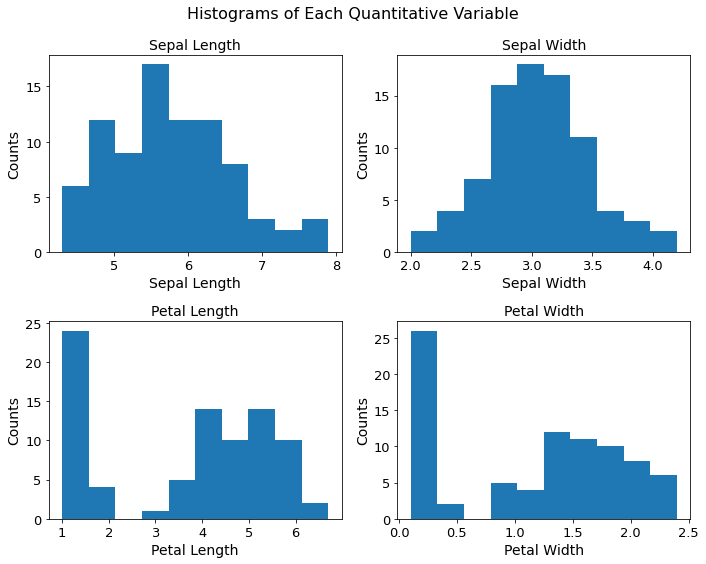

In [168]:
plt.figure(figsize = (10,8))

plt.suptitle('Histograms of Each Quantitative Variable', fontsize = 16)

plt.subplot(2,2,1)
plt.hist(x=train.sepal_length)
plt.title('Sepal Length', fontsize = 14)
plt.xlabel('Sepal Length', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.subplot(2,2,2)
plt.hist(x=train.sepal_width)
plt.title('Sepal Width', fontsize = 14)
plt.xlabel('Sepal Width', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.subplot(2,2,3)
plt.hist(x=train.petal_length)
plt.title('Petal Length', fontsize = 14)
plt.xlabel('Petal Length', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.subplot(2,2,4)
plt.hist(x=train.petal_width)
plt.title('Petal Width', fontsize = 14)
plt.xlabel('Petal Width', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)


plt.tight_layout()

plt.show()

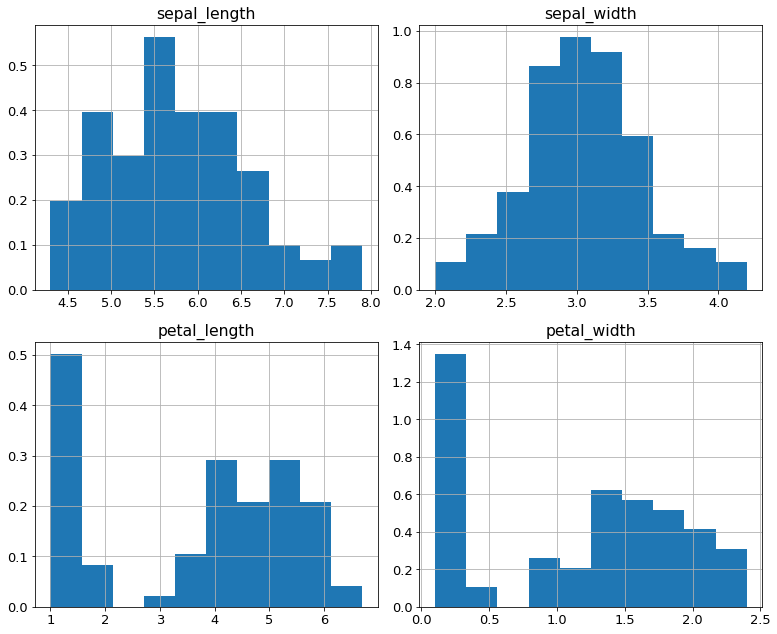

In [176]:
train.hist(density=True)

plt.tight_layout()

plt.show()

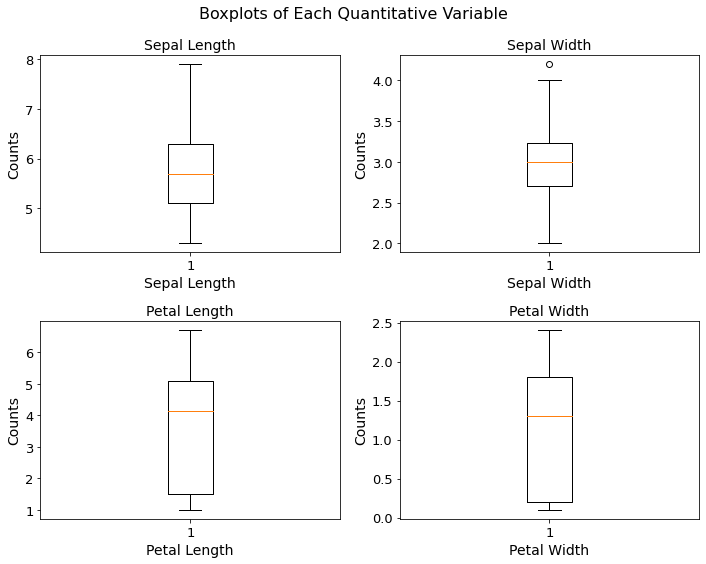

In [169]:
plt.figure(figsize = (10,8))

plt.suptitle('Boxplots of Each Quantitative Variable', fontsize = 16)

plt.subplot(2,2,1)
plt.boxplot(x=train.sepal_length)
plt.title('Sepal Length', fontsize = 14)
plt.xlabel('Sepal Length', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.subplot(2,2,2)
plt.boxplot(x=train.sepal_width)
plt.title('Sepal Width', fontsize = 14)
plt.xlabel('Sepal Width', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.subplot(2,2,3)
plt.boxplot(x=train.petal_length)
plt.title('Petal Length', fontsize = 14)
plt.xlabel('Petal Length', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.subplot(2,2,4)
plt.boxplot(x=train.petal_width)
plt.title('Petal Width', fontsize = 14)
plt.xlabel('Petal Width', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)


plt.tight_layout()

plt.show()

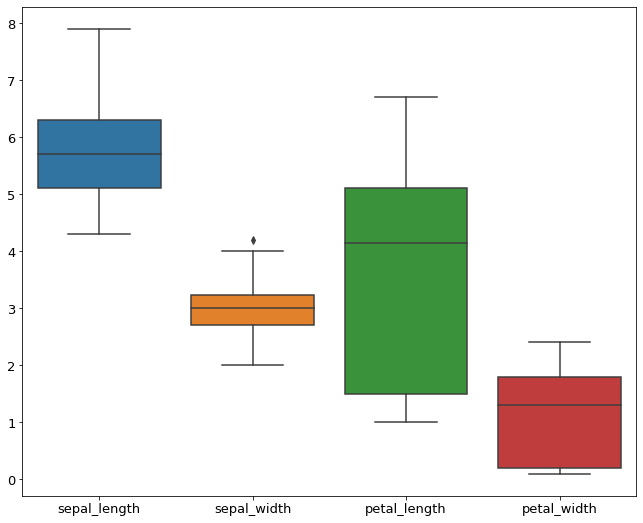

In [173]:
sns.boxplot(data=train.drop(columns = ['species']))

plt.show()

In [130]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.770238,0.802373,4.3,5.1,5.70,6.300,7.9
sepal_width,84.0,3.026190,0.416850,2.0,2.7,3.00,3.225,4.2
petal_length,84.0,3.670238,1.739947,1.0,1.5,4.15,5.100,6.7
petal_width,84.0,1.159524,0.747384,0.1,0.2,1.30,1.800,2.4


#### - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [182]:
pd.crosstab(index=train['species'], columns='count').reset_index()

col_0,species,count
0,setosa,28
1,versicolor,28
2,virginica,28


In [184]:
pd.crosstab(index=train['species'], columns='count', normalize=True).reset_index()

col_0,species,count
0,setosa,0.333333
1,versicolor,0.333333
2,virginica,0.333333


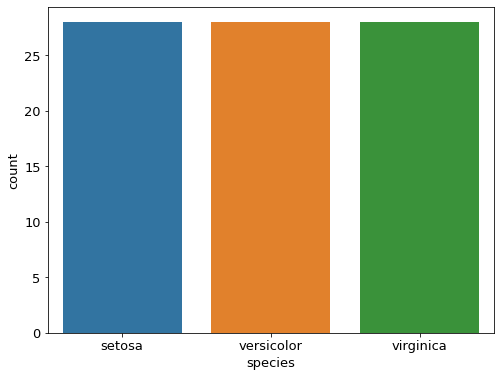

In [133]:
plt.figure(figsize = (8,6))

sns.barplot(data=crosstab, x='species', y='count')

plt.show()

### - Document takeaways & any actions.

- sepal measurements are almost normally distributed
- petal measurements are not normally distributed
- sepal measurements have fairly tight IQR
- sepal width has an outlier
- petal measurements are a larger IQR
- species counts are equal

### 3. Bivariate Stats

#### - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

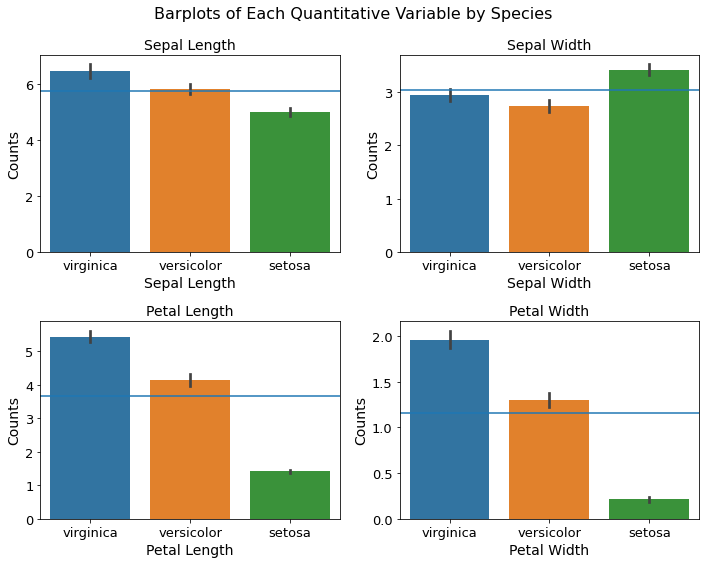

In [134]:
plt.figure(figsize = (10,8))

plt.suptitle('Barplots of Each Quantitative Variable by Species', fontsize = 16)

plt.subplot(2,2,1)
sns.barplot(data=train, x=train.species, y=train.sepal_length)
plt.title('Sepal Length', fontsize = 14)
plt.xlabel('Sepal Length', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.axhline(y=train.sepal_length.mean())

plt.subplot(2,2,2)
sns.barplot(data=train, x=train.species, y=train.sepal_width)
plt.title('Sepal Width', fontsize = 14)
plt.xlabel('Sepal Width', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.axhline(y=train.sepal_width.mean())

plt.subplot(2,2,3)
sns.barplot(data=train, x=train.species, y=train.petal_length)
plt.title('Petal Length', fontsize = 14)
plt.xlabel('Petal Length', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.axhline(y=train.petal_length.mean())

plt.subplot(2,2,4)
sns.barplot(data=train, x=train.species, y=train.petal_width)
plt.title('Petal Width', fontsize = 14)
plt.xlabel('Petal Width', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.axhline(y=train.petal_width.mean())


plt.tight_layout()

plt.show()

#### - For each measurement type, compute the descriptive statistics for each species.

In [135]:
train.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.010714    5.835714   6.464286
             std     0.381361    0.520124   0.678896
             min     4.300000    4.900000   4.900000
             25%     4.775000    5.575000   6.075000
             50%     5.000000    5.750000   6.400000
             75%     5.200000    6.050000   6.825000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.410714    2.732143   2.935714
             std     0.315453    0.306780   0.298408
             min     2.900000    2.000000   2.500000
             25%     3.175000    2.575000   2.700000
             50%     3.400000    2.750000   2.950000
             75%     3.600000    3.000000   3.100000
             max     4.200000    3.200000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.414286    4.150000   5.446429
             std     0.160357    0.496282   0.496269
             min     1.000000    3.000000   4.500000
             25%     1.375000    3.900000   5.100000
             50%     1.400000    4.150000   5.450000
             75%     1.500000    4.500000   5.700000
             max     1.700000    5.100000   6.700000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.217857    1.300000   1.960714
             std     0.072283    0.198139   0.258685
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.175000   1.800000
             50%     0.200000    1.300000   1.950000
             75%     0.200000    1.500000   2.100000
             max     0.400000    1.700000   2.400000

#### - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [136]:
virginica = train[train.species == 'virginica']
virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,virginica
113,5.7,2.5,5.0,2.0,virginica
143,6.8,3.2,5.9,2.3,virginica
139,6.9,3.1,5.4,2.1,virginica
135,7.7,3.0,6.1,2.3,virginica


In [137]:
versicolor = train[train.species == 'versicolor']
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
82,5.8,2.7,3.9,1.2,versicolor
78,6.0,2.9,4.5,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
92,5.8,2.6,4.0,1.2,versicolor
83,6.0,2.7,5.1,1.6,versicolor


In [140]:
stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width)

MannwhitneyuResult(statistic=16.0, pvalue=3.1379890824549294e-10)

In [141]:
stats.mannwhitneyu(virginica.petal_length, versicolor.petal_length)

MannwhitneyuResult(statistic=19.0, pvalue=4.918273489329833e-10)

In [142]:
stats.mannwhitneyu(virginica.sepal_width, versicolor.sepal_width)

MannwhitneyuResult(statistic=264.5, pvalue=0.018100322775320716)

In [143]:
stats.mannwhitneyu(virginica.sepal_length, versicolor.sepal_length)

MannwhitneyuResult(statistic=173.0, pvalue=0.0001660936610822683)

#### - Document takeaways & any actions.

- setosa is easiest to identify from the other species - most statisical measurements are quite different from the other 2 species
- all pvalues are less than a 0.05 alpha, meaning null hypotheses for all comparisons would be rejected, therefore confirming differences between virginica and versicolor

### 4. Multivariate Stats

#### - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

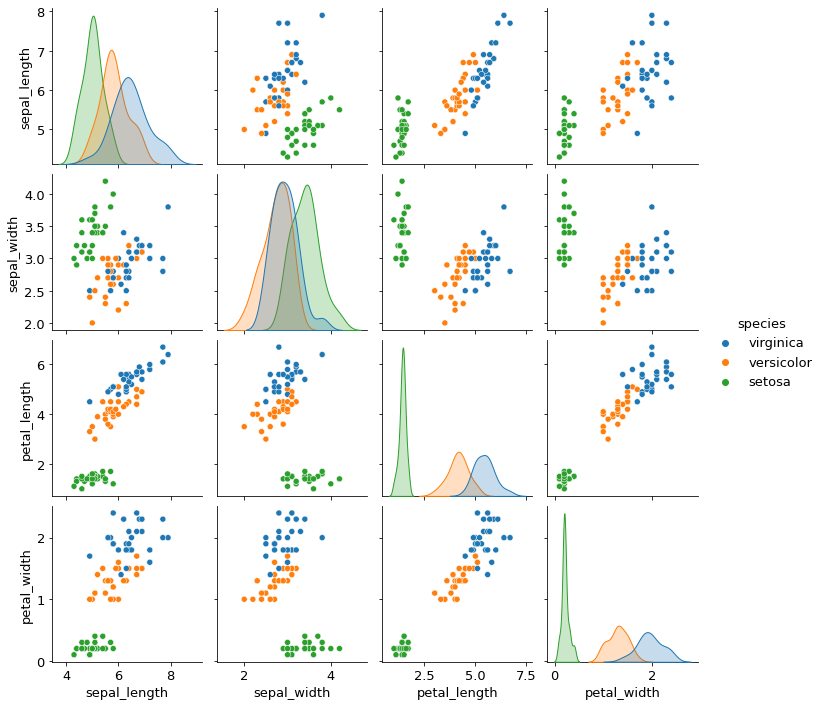

In [144]:
sns.pairplot(train, hue='species')

plt.show()

#### - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [145]:
train_melt = train.melt(id_vars='species', var_name='attribute', value_name='measurement')
train_melt.head()

,species,attribute,measurement
0,virginica,sepal_length,6.4
1,versicolor,sepal_length,5.8
2,versicolor,sepal_length,6.0
3,versicolor,sepal_length,5.5
4,virginica,sepal_length,5.7


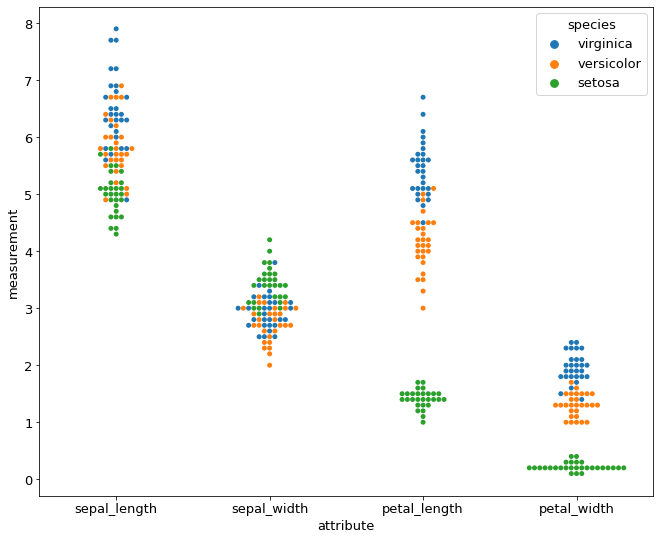

In [146]:
sns.swarmplot(x=train_melt.attribute, y=train_melt.measurement, hue=train_melt.species)

plt.show()

#### Takeaways:

- setosa measurements for petal are distinct from the other 2 species
- petal measurements show almost clear distinction between species
- sepal measurements for virginica and versicolor tend to have a good deal of overlap
- petal measurements for virginica and versicolor have less overlap

#### - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Is the petal area significantly different between virginica and versicolor?

Form hypothesis:

$H_0$: There is no significant difference of petal area between virginica and versicolor.

$H_a$: There is a significant difference of petal area between virginica and versicolor.

In [189]:
train['petal_area'] = train.petal_length * train.petal_width
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
137,6.4,3.1,5.5,1.8,virginica,9.90
82,5.8,2.7,3.9,1.2,versicolor,4.68
78,6.0,2.9,4.5,1.5,versicolor,6.75
53,5.5,2.3,4.0,1.3,versicolor,5.20
113,5.7,2.5,5.0,2.0,virginica,10.00


In [149]:
v_species = train.species[train.species != 'setosa']

v_petal = train.petal_area[train.species != 'setosa']

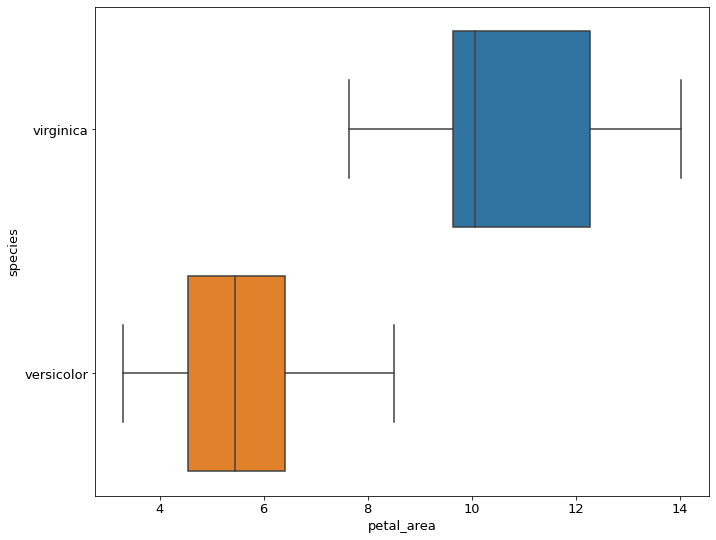

In [150]:
sns.boxplot(data=train, x=v_petal, y=v_species)

plt.show()

In [151]:
stat, pvalue = stats.mannwhitneyu(train[train.species == 'virginica'].petal_area, train[train.species == 'versicolor'].petal_area)
stat, pvalue

(6.0, 1.3230868648718414e-10)

In [152]:
alpha = 0.05

In [154]:
null_hypothesis = "there is no significant difference of petal area between virginica and versicolor."

if pvalue < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis that there is no significant difference of petal area between virginica and versicolor.


In [191]:
t, p = stats.ttest_ind(train[train.species == 'virginica'].petal_area, train[train.species == 'versicolor'].petal_area, equal_var=False)
t, p, alpha

(11.76129082238644, 5.346058772969696e-16, 0.05)

In [156]:
null_hypothesis = "there is no significant difference of petal area between virginica and versicolor."

if pvalue < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis that there is no significant difference of petal area between virginica and versicolor.


#### - Document takeaways and any actions.

- created column 'petal area' by petal length x petal width
- used variable with mask to compare species
- box plot shows clear distinction of petal area between the species
- limited overlap of petal area in widest ranges of the 2 species
- ran Mann-Whitney U test due to less than 30 observations
- also ran T-test for comparison